# read

In [167]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder # LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

train = pd.read_csv('./train_df.csv', encoding='cp949')
test  = pd.read_csv('./test_df.csv', encoding='cp949')
sub   = pd.read_csv('./sample_submission.csv', encoding='cp949')

In [168]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


In [169]:
train.shape, test.shape, sub.shape

((32000, 6), (4640, 5), (4640, 2))

In [170]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3


In [171]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [173]:
train.isnull().sum()

index            0
SEND_SPG_INNB    0
REC_SPG_INNB     0
DL_GD_LCLS_NM    0
DL_GD_MCLS_NM    0
INVC_CONT        0
dtype: int64

In [174]:
test.isnull().sum()

index            0
SEND_SPG_INNB    0
REC_SPG_INNB     0
DL_GD_LCLS_NM    0
DL_GD_MCLS_NM    0
dtype: int64

In [175]:
train['SEND_SPG_INNB'].head(35) # 11:5, 9:7, 7:4:5, 10:6

0     1129000014045300
1     1135000009051200
2     1135000030093100
3     1154500002014200
4     1165000021008300
5     1168000013091300
6     1171000019003100
7     2623000012072300
8     2626000011052400
9     2726000034007300
10    2729000029060300
11    2811000069044300
12    2820000053057300
13    2914000013007300
14    3023000012008100
15    3023000012008100
16    3023000012008100
17    4111300037051300
18    4119900009063300
19    4119900009063300
20    4119900009063300
21    4121000015010300
22    4121000015010300
23    4122000151090400
24    4127300065073100
25    4128500028049400
26    4136000185087300
27    4136000216029100
28    4136000216029100
29    4136000216029100
30    4136000216029100
31    4141000031009400
32    4141000031030100
33    4141000031030100
34    4141000031030100
Name: SEND_SPG_INNB, dtype: int64

## 시도(2)+시군구(3)+읍면동(3)+리(2)

In [176]:
# train['send_2'] = train["SEND_SPG_INNB"].astype('str').str[:2].astype('int64')
# test['send_2'] = test["SEND_SPG_INNB"].astype('str').str[:2].astype('int64')

# train['send_5'] = train["SEND_SPG_INNB"].astype('str').str[:5].astype('int64')
# test['send_5'] = test["SEND_SPG_INNB"].astype('str').str[:5].astype('int64')

# train['send_8'] = train["SEND_SPG_INNB"].astype('str').str[:8].astype('int64')
# test['send_8'] = test["SEND_SPG_INNB"].astype('str').str[:8].astype('int64')

# train['send_10'] = train["SEND_SPG_INNB"].astype('str').str[:10].astype('int64')
# test['send_10'] = test["SEND_SPG_INNB"].astype('str').str[:10].astype('int64')

# train['send_back_6'] = train["SEND_SPG_INNB"].astype('str').str[-6:].astype('int64')
# test['send_back_6'] = test["SEND_SPG_INNB"].astype('str').str[-6:].astype('int64')

In [177]:
# # train['send_1'] = train["SEND_SPG_INNB"].astype('str').str[:1].astype('int64')
# # train['send_2'] = train["SEND_SPG_INNB"].astype('str').str[:2].astype('int64')
# train['send_3'] = train["SEND_SPG_INNB"].astype('str').str[:3].astype('int64')
# train['send_4'] = train["SEND_SPG_INNB"].astype('str').str[:4].astype('int64')
# train['send_5'] = train["SEND_SPG_INNB"].astype('str').str[:5].astype('int64')
# # train['send_6'] = train["SEND_SPG_INNB"].astype('str').str[:6].astype('int64')
# train['send_7'] = train["SEND_SPG_INNB"].astype('str').str[:7].astype('int64')
# train['send_8'] = train["SEND_SPG_INNB"].astype('str').str[:8].astype('int64')
# train['send_9'] = train["SEND_SPG_INNB"].astype('str').str[:9].astype('int64')
# # train['send_10'] = train["SEND_SPG_INNB"].astype('str').str[:10].astype('int64')
# # train['send_11'] = train["SEND_SPG_INNB"].astype('str').str[:11].astype('int64')
# # train['send_12'] = train["SEND_SPG_INNB"].astype('str').str[:12].astype('int64')
# # train['send_13'] = train["SEND_SPG_INNB"].astype('str').str[:13].astype('int64')
# # train['send_14'] = train["SEND_SPG_INNB"].astype('str').str[:14].astype('int64')
# # train['send_15'] = train["SEND_SPG_INNB"].astype('str').str[:15].astype('int64')
# # train['send_16'] = train["SEND_SPG_INNB"].astype('str').str[:16].astype('int64')

# # train['send_2'] = train["SEND_SPG_INNB"].astype('str').str[:2].astype('int64')
# # train['send_5'] = train["SEND_SPG_INNB"].astype('str').str[:5].astype('int64')

# # train['send_5_8'] = train["SEND_SPG_INNB"].astype('str').str[5:8].astype('int64') # 읍면동
# # train['send_8_10'] = train["SEND_SPG_INNB"].astype('str').str[8:10].astype('int64') # 리

# # test['send_5_8'] = test["SEND_SPG_INNB"].astype('str').str[5:8].astype('int64')
# # test['send_8_10'] = test["SEND_SPG_INNB"].astype('str').str[8:10].astype('int64')


# train.hist(figsize=(10, 10))

In [178]:
# print(train['send_2'].nunique()) 
# # print(train['send_3'].nunique()) # 64
# # print(train['send_4'].nunique()) # 213 
# print(train['send_5'].nunique()) # 234
# # print(train['send_6'].nunique())
# # print(train['send_7'].nunique()) # 240
# print(train['send_8'].nunique()) # 511
# # print(train['send_9'].nunique()) # 1161
# print(train['send_10'].nunique())


# 격자고유번호 선별

In [181]:
# for slice in range(1, 17):
#     train['rec_' + str(slice)] = train['REC_SPG_INNB'].astype('str').str[:slice].astype('int64')
#     train['send_' + str(slice)] = train["SEND_SPG_INNB"].astype('str').str[:slice].astype('int64')
    
#     test['rec_' + str(slice)] = test['REC_SPG_INNB'].astype('str').str[:slice].astype('int64')
#     test['send_' + str(slice)] = test["SEND_SPG_INNB"].astype('str').str[:slice].astype('int64')

# for slice in range(1, 17):
#     print('send_' + str(slice), train['send_' + str(slice)].nunique())
# for slice in range(1, 17):
#     print('rec_' + str(slice), train['rec_' + str(slice)].nunique())

<pre>
unique 갯수가 20 이하인 애들 + unique 갯수가 비슷하거나 같은 애들은 삭제 (더블클릭하면 갯수보임**)

<!-- send_1 5
send_2 17 -->
send_3 64
send_4 213
send_5 234
<!-- send_6 234 -->
send_7 240
send_8 511
send_9 1161
<!-- send_10 2069 -->
send_11 2082
send_12 3081
<!-- send_13 3581 -->
send_14 3684
<!-- send_15 3684 -->
<!-- send_16 3684 -->

<!-- rec_1 5
rec_2 17 -->
rec_3 65
rec_4 229
rec_5 251
<!-- rec_6 251 -->
<!-- rec_7 268 -->
rec_8 979
rec_9 3353
rec_10 7739
<!-- rec_11 7945 -->
rec_12 19039
<!-- rec_13 26039 -->
rec_14 27826
<!-- rec_15 27826 -->
<!-- rec_16 27826 -->

</pre>

In [ ]:
slices = [3, 4, 7, 8, 9, 11, 12, 14]

for slice in slices:
    train['rec_' + str(slice)] = train['REC_SPG_INNB'].astype('str').str[:slice].astype('int64')
    train['send_' + str(slice)] = train["SEND_SPG_INNB"].astype('str').str[:slice].astype('int64')
    
    test['rec_' + str(slice)] = test['REC_SPG_INNB'].astype('str').str[:slice].astype('int64')
    test['send_' + str(slice)] = test["SEND_SPG_INNB"].astype('str').str[:slice].astype('int64')

In [116]:
# # train['rec_2'] = train["REC_SPG_INNB"].astype('str').str[:2].astype('int64')
# train['rec_3'] = train["REC_SPG_INNB"].astype('str').str[:3].astype('int64')
# train['rec_4'] = train["REC_SPG_INNB"].astype('str').str[:4].astype('int64')
# train['rec_5'] = train["REC_SPG_INNB"].astype('str').str[:5].astype('int64')
# # train['rec_6'] = train["REC_SPG_INNB"].astype('str').str[:6].astype('int64')
# train['rec_7'] = train["REC_SPG_INNB"].astype('str').str[:7].astype('int64')
# train['rec_8'] = train["REC_SPG_INNB"].astype('str').str[:8].astype('int64')
# train['rec_9'] = train["REC_SPG_INNB"].astype('str').str[:9].astype('int64')
# # train['rec_10'] = train["REC_SPG_INNB"].astype('str').str[:10].astype('int64')

In [117]:
# print(train['rec_2'].nunique()) # 17
# # print(train['rec_3'].nunique()) # 65
# # print(train['rec_4'].nunique()) # 229
# print(train['rec_5'].nunique()) # 251
# # print(train['rec_6'].nunique())
# # print(train['rec_7'].nunique()) # 268
# print(train['rec_8'].nunique()) # 979
# # print(train['rec_9'].nunique()) # 3353
# print(train['rec_10'].nunique()) # 7739

In [118]:
# # test['send_2'] = test["SEND_SPG_INNB"].astype('str').str[:2].astype('int64')
# test['send_3'] = test["SEND_SPG_INNB"].astype('str').str[:3].astype('int64')
# test['send_4'] = test["SEND_SPG_INNB"].astype('str').str[:4].astype('int64')
# test['send_5'] = test["SEND_SPG_INNB"].astype('str').str[:5].astype('int64')
# # test['send_6'] = test["SEND_SPG_INNB"].astype('str').str[:6].astype('int64')
# test['send_7'] = test["SEND_SPG_INNB"].astype('str').str[:7].astype('int64')
# test['send_8'] = test["SEND_SPG_INNB"].astype('str').str[:8].astype('int64')
# test['send_9'] = test["SEND_SPG_INNB"].astype('str').str[:9].astype('int64')
# # test['send_10'] = test["SEND_SPG_INNB"].astype('str').str[:10].astype('int64')

In [119]:
# # test['rec_2'] = test["REC_SPG_INNB"].astype('str').str[:2].astype('int64')
# test['rec_3'] = test["REC_SPG_INNB"].astype('str').str[:3].astype('int64')
# test['rec_4'] = test["REC_SPG_INNB"].astype('str').str[:4].astype('int64')
# test['rec_5'] = test["REC_SPG_INNB"].astype('str').str[:5].astype('int64')
# # test['rec_6'] = test["REC_SPG_INNB"].astype('str').str[:6].astype('int64')
# test['rec_7'] = test["REC_SPG_INNB"].astype('str').str[:7].astype('int64')
# test['rec_8'] = test["REC_SPG_INNB"].astype('str').str[:8].astype('int64')
# test['rec_9'] = test["REC_SPG_INNB"].astype('str').str[:9].astype('int64')
# # test['rec_10'] = test["REC_SPG_INNB"].astype('str').str[:10].astype('int64')

In [120]:
# train['rec_2'] = train["REC_SPG_INNB"].astype('str').str[:2].astype('int64')
# test['rec_2'] = test["REC_SPG_INNB"].astype('str').str[:2].astype('int64')

# train['rec_5'] = train["REC_SPG_INNB"].astype('str').str[:5].astype('int64')
# test['rec_5'] = test["REC_SPG_INNB"].astype('str').str[:5].astype('int64')

# train['rec_8'] = train["REC_SPG_INNB"].astype('str').str[:8].astype('int64')
# test['rec_8'] = test["REC_SPG_INNB"].astype('str').str[:8].astype('int64')

# train['rec_10'] = train["REC_SPG_INNB"].astype('str').str[:10].astype('int64')
# test['rec_10'] = test["REC_SPG_INNB"].astype('str').str[:10].astype('int64')

# train['rec_back_6'] = train["REC_SPG_INNB"].astype('str').str[-6:].astype('int64')
# test['rec_back_6'] = test["REC_SPG_INNB"].astype('str').str[-6:].astype('int64')

c:\AI\pythonProject\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\AI\pythonProject\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

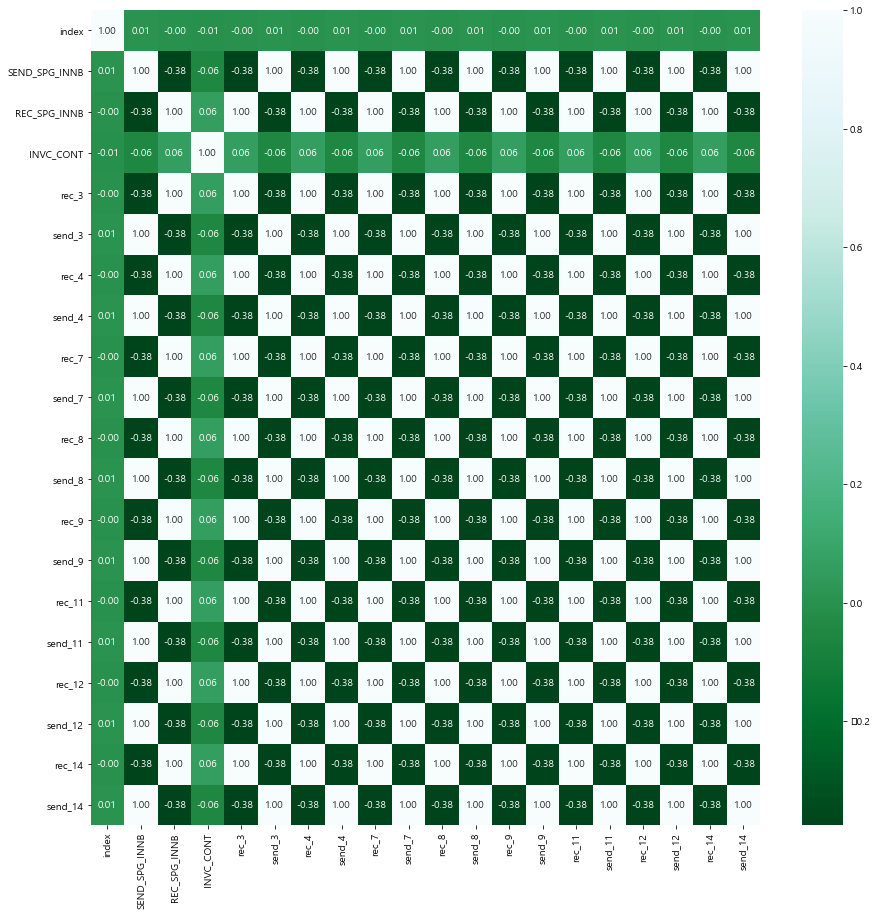

In [121]:
plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), fmt='.2f', annot=True, cmap= 'BuGn_r')

In [122]:
train[train['SEND_SPG_INNB']==train['REC_SPG_INNB']]['INVC_CONT'].count()

37

In [123]:
train[train['SEND_SPG_INNB']!=train['REC_SPG_INNB']]['INVC_CONT'].count()

31963

In [124]:
# SEND_SPG_INNB == REC_SPG_INNB

# idxs = train[train['SEND_SPG_INNB'] == train['REC_SPG_INNB']].index
# train['same'] = 0

# for idx in idxs:
#     train.loc[idx, 'same'] = 1

# idxs = test[test['SEND_SPG_INNB'] == test['REC_SPG_INNB']].index
# test['same'] = 0

# for idx in idxs:
#     test.loc[idx, 'same'] = 1

In [125]:
# SEND_SPG_INNB != REC_SPG_INNB

idxs = train[train['SEND_SPG_INNB'] != train['REC_SPG_INNB']].index
train['not_same'] = 0

for idx in idxs:
    train.loc[idx, 'not_same'] = 1

idxs = test[test['SEND_SPG_INNB'] != test['REC_SPG_INNB']].index
test['not_same'] = 0

for idx in idxs:
    test.loc[idx, 'not_same'] = 1

## 제주도 간 물류 유통

In [126]:
train['send_1'] = train["SEND_SPG_INNB"].astype('str').str[:1].astype('int64')
train['rec_1'] = train["REC_SPG_INNB"].astype('str').str[:1].astype('int64')

test['send_1'] = test["SEND_SPG_INNB"].astype('str').str[:1].astype('int64') 
test['rec_1'] = test["REC_SPG_INNB"].astype('str').str[:1].astype('int64')

In [127]:
train['send_2'] = train["SEND_SPG_INNB"].astype('str').str[:2].astype('int64')
train['rec_2'] = train["REC_SPG_INNB"].astype('str').str[:2].astype('int64')

test['send_2'] = test["SEND_SPG_INNB"].astype('str').str[:2].astype('int64')
test['rec_2'] = test["REC_SPG_INNB"].astype('str').str[:2].astype('int64')

In [128]:
# train['send_3'] = train["SEND_SPG_INNB"].astype('str').str[:3].astype('int64')
# train['rec_3'] = train["REC_SPG_INNB"].astype('str').str[:3].astype('int64')

# test['send_3'] = test["SEND_SPG_INNB"].astype('str').str[:3].astype('int64')
# test['rec_3'] = test["REC_SPG_INNB"].astype('str').str[:3].astype('int64')

In [129]:
print(train[train['send_1']==5][['send_1', 'SEND_SPG_INNB']].shape)
print(train[train['send_2']==50][['send_2', 'SEND_SPG_INNB']].shape)
print(train[train['send_3']==501][['send_3', 'SEND_SPG_INNB']].shape) # 5: 제주도

(25344, 2)
(25344, 2)
(25344, 2)


In [130]:
jeju_idx = train[(train['send_1'] == 5) & (train['rec_1'] == 5)].index # ['INVC_CONT'].count()

train['jeju'] = 0

for idx in jeju_idx:
    train.loc[idx, 'jeju'] = 1

In [131]:
# train[(train['send_1'] == 5) | (train['rec_1'] == 5)]['INVC_CONT'].count() # .index

In [132]:
jeju_idx = test[(test['send_1'] == 5) & (test['rec_1'] == 5)].index # ['INVC_CONT'].count()

test['jeju'] = 0

for idx in jeju_idx:
    test.loc[idx, 'jeju'] = 1

## 유통량 많은 send_1 가중치

In [133]:
# 5
train.groupby('send_1').count()[['INVC_CONT']].sort_values('INVC_CONT', ascending=False)

,INVC_CONT
send_1,
5,25344
4,4984
1,859
2,550
3,263


In [134]:
train['send_1_plus'] = 0
train.loc[train['send_1']==5, 'send_1_plus'] = 1

test['send_1_plus'] = 0
test.loc[test['send_1']==5, 'send_1_plus'] = 1

In [135]:
# 4
train.groupby('rec_1').count()[['INVC_CONT']].sort_values('INVC_CONT', ascending=False)

,INVC_CONT
rec_1,
4,14260
5,6833
1,4984
2,4514
3,1409


In [136]:
train['rec_1_plus'] = 0
train.loc[train['rec_1']==4, 'rec_1_plus'] = 1

test['rec_1_plus'] = 0
test.loc[test['rec_1']==4, 'rec_1_plus'] = 1

## 운송량 많은 중분류 or 대분류에 가중치

In [137]:
# train.groupby('DL_GD_MCLS_NM').count()[['INVC_CONT']].sort_values('INVC_CONT', ascending=False)

In [138]:
# train['farm_plus'] = 0
# train.loc[train['DL_GD_MCLS_NM'] == '농산물', 'farm_plus'] = 1
# train.head()

In [139]:
# test['farm_plus'] = 0
# test.loc[test['DL_GD_MCLS_NM'] == '농산물', 'farm_plus'] = 1

In [140]:
train.groupby('DL_GD_LCLS_NM').count()[['INVC_CONT']].sort_values('INVC_CONT', ascending=False)

,INVC_CONT
DL_GD_LCLS_NM,
식품,27738
생활/건강,2020
여행/문화,1192
패션의류,582
디지털/가전,241
화장품/미용,227


In [141]:
train['food_plus'] = 0
train.loc[train['DL_GD_LCLS_NM'] == '식품', 'food_plus'] = 1
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,rec_3,send_3,rec_4,send_4,rec_7,send_7,rec_8,send_8,rec_9,send_9,rec_11,send_11,rec_12,send_12,rec_14,send_14,not_same,send_1,rec_1,send_2,rec_2,jeju,send_1_plus,rec_1_plus,food_plus
0,0,1129000014045300,5011000220046300,패션의류,상의,3,501,112,5011,1129,5011000,1129000,50110002,11290000,501100022,112900001,50110002200,11290000140,501100022004,112900001404,50110002200463,11290000140453,1,1,5,11,50,0,0,0,0
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3,501,113,5011,1135,5011000,1135000,50110001,11350000,501100017,113500000,50110001780,11350000090,501100017803,113500000905,50110001780373,11350000090512,1,1,5,11,50,0,0,0,0
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9,501,113,5011,1135,5011000,1135000,50110002,11350000,501100026,113500003,50110002650,11350000300,501100026509,113500003009,50110002650914,11350000300931,1,1,5,11,50,0,0,0,0
3,3,1154500002014200,5011000315087400,식품,농산물,10,501,115,5011,1154,5011000,1154500,50110003,11545000,501100031,115450000,50110003150,11545000020,501100031508,115450000201,50110003150874,11545000020142,1,1,5,11,50,0,0,0,1
4,4,1165000021008300,5011000177051200,식품,가공식품,3,501,116,5011,1165,5011000,1165000,50110001,11650000,501100017,116500002,50110001770,11650000210,501100017705,116500002100,50110001770512,11650000210083,1,1,5,11,50,0,0,0,1


In [142]:
test['food_plus'] = 0
test.loc[test['DL_GD_LCLS_NM'] == '식품', 'food_plus'] = 1

## 중분류 대분류

In [143]:
train.groupby('DL_GD_MCLS_NM').mean()[['INVC_CONT']].sort_values('INVC_CONT', ascending=False).to_csv('중분류.csv')

In [144]:
mcls = pd.read_csv('중분류.csv')
mcls.rename(columns={'INVC_CONT':'mcls_mean'}, inplace=True )
mcls.head(10)

,DL_GD_MCLS_NM,mcls_mean
0,기타패션의류,10.375479
1,건강용품,10.238636
2,축산,8.196172
3,문구/사무용품,7.900000
4,가공식품,6.807151
5,기타디지털/가전,6.547718
6,기타식품,6.130548
7,건강식품,5.780338
8,과자,5.767241
9,음료,5.745115


In [145]:
train.groupby('DL_GD_LCLS_NM').mean()[['INVC_CONT']].sort_values('INVC_CONT', ascending=False).to_csv('대분류.csv')

In [146]:
lcls = pd.read_csv('대분류.csv')
lcls.rename(columns={'INVC_CONT':'lcls_mean'}, inplace=True )
lcls.head(10)

,DL_GD_LCLS_NM,lcls_mean
0,패션의류,6.678694
1,디지털/가전,6.547718
2,생활/건강,5.407921
3,여행/문화,4.958893
4,화장품/미용,4.682819
5,식품,4.658195


In [147]:
train = pd.merge(train, lcls, how = 'left', on='DL_GD_LCLS_NM') # 대분류
train = pd.merge(train, mcls, how = 'left', on='DL_GD_MCLS_NM') # 중분류
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,rec_3,send_3,rec_4,send_4,rec_7,send_7,rec_8,send_8,rec_9,send_9,rec_11,send_11,rec_12,send_12,rec_14,send_14,not_same,send_1,rec_1,send_2,rec_2,jeju,send_1_plus,rec_1_plus,food_plus,lcls_mean,mcls_mean
0,0,1129000014045300,5011000220046300,패션의류,상의,3,501,112,5011,1129,5011000,1129000,50110002,11290000,501100022,112900001,50110002200,11290000140,501100022004,112900001404,50110002200463,11290000140453,1,1,5,11,50,0,0,0,0,6.678694,3.672897
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3,501,113,5011,1135,5011000,1135000,50110001,11350000,501100017,113500000,50110001780,11350000090,501100017803,113500000905,50110001780373,11350000090512,1,1,5,11,50,0,0,0,0,5.407921,4.444134
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9,501,113,5011,1135,5011000,1135000,50110002,11350000,501100026,113500003,50110002650,11350000300,501100026509,113500003009,50110002650914,11350000300931,1,1,5,11,50,0,0,0,0,6.678694,10.375479
3,3,1154500002014200,5011000315087400,식품,농산물,10,501,115,5011,1154,5011000,1154500,50110003,11545000,501100031,115450000,50110003150,11545000020,501100031508,115450000201,50110003150874,11545000020142,1,1,5,11,50,0,0,0,1,4.658195,4.297401
4,4,1165000021008300,5011000177051200,식품,가공식품,3,501,116,5011,1165,5011000,1165000,50110001,11650000,501100017,116500002,50110001770,11650000210,501100017705,116500002100,50110001770512,11650000210083,1,1,5,11,50,0,0,0,1,4.658195,6.807151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,식품,농산물,6,263,501,2635,5011,2635000,5011001,26350000,50110010,263500002,501100106,26350000260,50110010600,263500002605,501100106006,26350000260534,50110010600633,1,5,2,50,26,0,1,0,1,4.658195,4.297401
31996,31996,5011001095042400,1168000017002200,식품,기타식품,5,116,501,1168,5011,1168000,5011001,11680000,50110010,116800001,501100109,11680000170,50110010950,116800001700,501100109504,11680000170022,50110010950424,1,5,1,50,11,0,1,0,1,4.658195,6.130548
31997,31997,5011001108036200,4119700008012100,식품,농산물,9,411,501,4119,5011,4119700,5011001,41197000,50110011,411970000,501100110,41197000080,50110011080,411970000801,501100110803,41197000080121,50110011080362,1,5,4,50,41,0,1,1,1,4.658195,4.297401
31998,31998,5011001115011400,1132000015085100,식품,농산물,3,113,501,1132,5011,1132000,5011001,11320000,50110011,113200001,501100111,11320000150,50110011150,113200001508,501100111501,11320000150851,50110011150114,1,5,1,50,11,0,1,0,1,4.658195,4.297401


In [148]:
test = pd.merge(test, lcls, how = 'left', on='DL_GD_LCLS_NM') # 대분류
test = pd.merge(test, mcls, how = 'left', on='DL_GD_MCLS_NM') # 중분류
test

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,rec_3,send_3,rec_4,send_4,rec_7,send_7,rec_8,send_8,rec_9,send_9,rec_11,send_11,rec_12,send_12,rec_14,send_14,not_same,send_1,rec_1,send_2,rec_2,jeju,send_1_plus,rec_1_plus,food_plus,lcls_mean,mcls_mean
0,32000,5013000043028400,1165000021097200,식품,농산물,116,501,1165,5013,1165000,5013000,11650000,50130000,116500002,501300004,11650000210,50130000430,116500002109,501300004302,11650000210972,50130000430284,1,5,1,50,11,0,1,0,1,4.658195,4.297401
1,32001,5013000044016100,1154500002066400,식품,농산물,115,501,1154,5013,1154500,5013000,11545000,50130000,115450000,501300004,11545000020,50130000440,115450000206,501300004401,11545000020664,50130000440161,1,5,1,50,11,0,1,0,1,4.658195,4.297401
2,32002,5013000205030200,4139000102013200,식품,농산물,413,501,4139,5013,4139000,5013000,41390001,50130002,413900010,501300020,41390001020,50130002050,413900010201,501300020503,41390001020132,50130002050302,1,5,4,50,41,0,1,1,1,4.658195,4.297401
3,32003,5013000205030200,4221000040093400,식품,농산물,422,501,4221,5013,4221000,5013000,42210000,50130002,422100004,501300020,42210000400,50130002050,422100004009,501300020503,42210000400934,50130002050302,1,5,4,50,42,0,1,1,1,4.658195,4.297401
4,32004,5013000268011400,2726000004017100,식품,농산물,272,501,2726,5013,2726000,5013000,27260000,50130002,272600000,501300026,27260000040,50130002680,272600000401,501300026801,27260000040171,50130002680114,1,5,2,50,27,0,1,0,1,4.658195,4.297401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,36635,5013000858004400,4725000719072200,식품,농산물,472,501,4725,5013,4725000,5013000,47250007,50130008,472500071,501300085,47250007190,50130008580,472500071907,501300085800,47250007190722,50130008580044,1,5,4,50,47,0,1,1,1,4.658195,4.297401
4636,36636,5013000870018300,2826000106075300,식품,농산물,282,501,2826,5013,2826000,5013000,28260001,50130008,282600010,501300087,28260001060,50130008700,282600010607,501300087001,28260001060753,50130008700183,1,5,2,50,28,0,1,0,1,4.658195,4.297401
4637,36637,5013000897086300,4311100034004300,식품,농산물,431,501,4311,5013,4311100,5013000,43111000,50130008,431110003,501300089,43111000340,50130008970,431110003400,501300089708,43111000340043,50130008970863,1,5,4,50,43,0,1,1,1,4.658195,4.297401
4638,36638,5013000902065100,4145000013011200,식품,농산물,414,501,4145,5013,4145000,5013000,41450000,50130009,414500001,501300090,41450000130,50130009020,414500001301,501300090206,41450000130112,50130009020651,1,5,4,50,41,0,1,1,1,4.658195,4.297401


In [149]:
# 반올림

train['lcls_mean'] = np.round(train['lcls_mean'], 0).astype('int')
test['lcls_mean'] = np.round(test['lcls_mean'], 0).astype('int')

train['mcls_mean'] = np.round(train['mcls_mean'], 0).astype('int')
test['mcls_mean'] = np.round(test['mcls_mean'], 0).astype('int')

# Drop

In [150]:
train.drop(['SEND_SPG_INNB', 'REC_SPG_INNB', 'DL_GD_MCLS_NM', 'DL_GD_LCLS_NM', 'index', 'send_1', 'send_2', 'rec_1', 'rec_2'], axis=1, inplace=True) # 
test.drop(['SEND_SPG_INNB', 'REC_SPG_INNB', 'DL_GD_MCLS_NM', 'DL_GD_LCLS_NM', 'index', 'send_1', 'send_2', 'rec_1', 'rec_2'], axis=1, inplace=True) # 'SEND_SPG_INNB', 'REC_SPG_INNB', 

# Encoding

In [151]:
obj_cols = []
for col in train.columns:
    if train[col].dtype == 'object':
        obj_cols.append(col)

print(obj_cols)

[]


In [48]:
# encoder = OrdinalEncoder()
# train[['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']] = encoder.fit_transform(train[['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']])

# train = pd.get_dummies(train)
# test  = pd.get_dummies(test)

In [152]:
train.head()

,INVC_CONT,rec_3,send_3,rec_4,send_4,rec_7,send_7,rec_8,send_8,rec_9,send_9,rec_11,send_11,rec_12,send_12,rec_14,send_14,not_same,jeju,send_1_plus,rec_1_plus,food_plus,lcls_mean,mcls_mean
0,3,501,112,5011,1129,5011000,1129000,50110002,11290000,501100022,112900001,50110002200,11290000140,501100022004,112900001404,50110002200463,11290000140453,1,0,0,0,0,7,4
1,3,501,113,5011,1135,5011000,1135000,50110001,11350000,501100017,113500000,50110001780,11350000090,501100017803,113500000905,50110001780373,11350000090512,1,0,0,0,0,5,4
2,9,501,113,5011,1135,5011000,1135000,50110002,11350000,501100026,113500003,50110002650,11350000300,501100026509,113500003009,50110002650914,11350000300931,1,0,0,0,0,7,10
3,10,501,115,5011,1154,5011000,1154500,50110003,11545000,501100031,115450000,50110003150,11545000020,501100031508,115450000201,50110003150874,11545000020142,1,0,0,0,1,5,4
4,3,501,116,5011,1165,5011000,1165000,50110001,11650000,501100017,116500002,50110001770,11650000210,501100017705,116500002100,50110001770512,11650000210083,1,0,0,0,1,5,7


c:\AI\pythonProject\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\AI\pythonProject\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

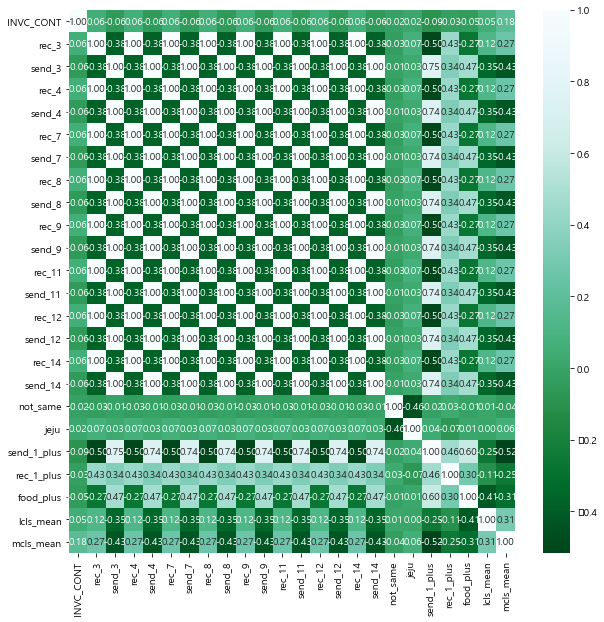

In [153]:
plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), fmt='.2f', annot=True, cmap= 'BuGn_r')

In [154]:
cols = train.columns

In [155]:
dis_cols=[]   #이산형 
cont_cols=[]  #연속형
for col in cols:
    #print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')
    if(train[col].nunique() < 21):
        dis_cols.append(col)
    else:
        cont_cols.append(col)

이산형
not_same 		 2 		 [1 0]
jeju 		 2 		 [0 1]
send_1_plus 		 2 		 [0 1]
rec_1_plus 		 2 		 [0 1]
food_plus 		 2 		 [0 1]
lcls_mean 		 2 		 [7 5]
mcls_mean 		 6 		 [ 4 10  7  5  6]
----------------------------------------------------------------------------------------------------
연속형
INVC_CONT 		 90 		 [ 3  9 10  5  4]
rec_3 		 65 		 [501 282 112 114 115]
send_3 		 64 		 [112 113 115 116 117]
rec_4 		 229 		 [5011 5013 2826 1123 1147]
send_4 		 213 		 [1129 1135 1154 1165 1168]
rec_7 		 268 		 [5011000 5013000 2826000 1123000 1147000]
send_7 		 240 		 [1129000 1135000 1154500 1165000 1168000]
rec_8 		 979 		 [50110002 50110001 50110003 50110004 50110006]
send_8 		 511 		 [11290000 11350000 11545000 11650000 11680000]
rec_9 		 3353 		 [501100022 501100017 501100026 501100031 501100043]
send_9 		 1161 		 [112900001 113500000 113500003 115450000 116500002]
rec_11 		 7945 		 [50110002200 50110001780 50110002650 50110003150 50110001770]
send_11 		 2082 		 [11290000140 11350000090 1135000030

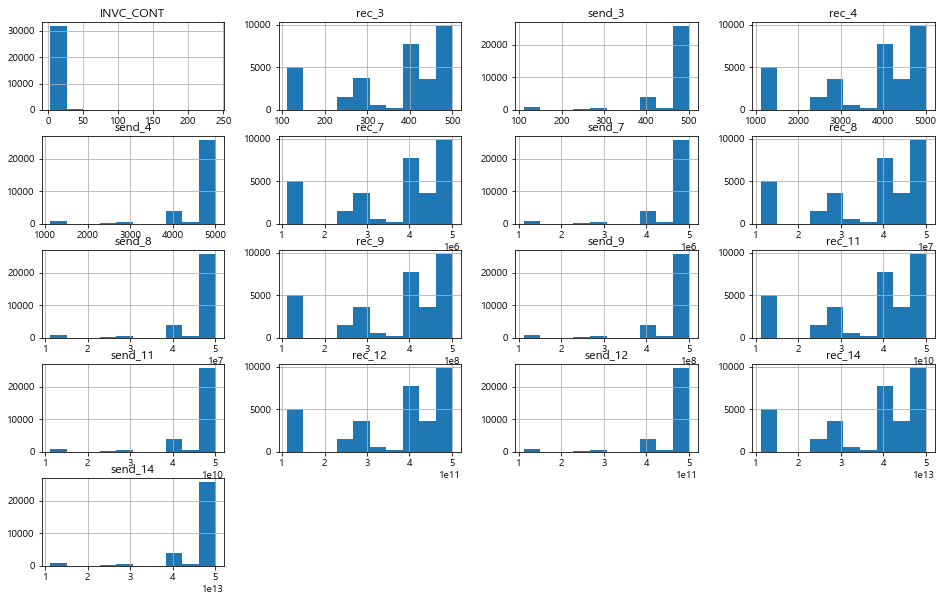

In [156]:
print('이산형')
for col in dis_cols:
    print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')
print("--"*50)
print('연속형')
for col in cont_cols:
    print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')

train[cont_cols].hist(figsize=(16,10))
plt.show()

# for col in dis_cols:
#     train[dis_cols].plot.bar(col)
# plt.show()


In [604]:
# fig = plt.subplots(figsize=(10, 10))
# sns.heatmap(train.corr(), fmt='.4f', annot=True, cmap='Blues')

In [157]:
train.head()

,INVC_CONT,rec_3,send_3,rec_4,send_4,rec_7,send_7,rec_8,send_8,rec_9,send_9,rec_11,send_11,rec_12,send_12,rec_14,send_14,not_same,jeju,send_1_plus,rec_1_plus,food_plus,lcls_mean,mcls_mean
0,3,501,112,5011,1129,5011000,1129000,50110002,11290000,501100022,112900001,50110002200,11290000140,501100022004,112900001404,50110002200463,11290000140453,1,0,0,0,0,7,4
1,3,501,113,5011,1135,5011000,1135000,50110001,11350000,501100017,113500000,50110001780,11350000090,501100017803,113500000905,50110001780373,11350000090512,1,0,0,0,0,5,4
2,9,501,113,5011,1135,5011000,1135000,50110002,11350000,501100026,113500003,50110002650,11350000300,501100026509,113500003009,50110002650914,11350000300931,1,0,0,0,0,7,10
3,10,501,115,5011,1154,5011000,1154500,50110003,11545000,501100031,115450000,50110003150,11545000020,501100031508,115450000201,50110003150874,11545000020142,1,0,0,0,1,5,4
4,3,501,116,5011,1165,5011000,1165000,50110001,11650000,501100017,116500002,50110001770,11650000210,501100017705,116500002100,50110001770512,11650000210083,1,0,0,0,1,5,7


# Scaler

In [606]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [607]:
# X = train.drop('INVC_CONT',axis = 1)
# y = train['INVC_CONT']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2)

In [608]:
# scalers = [StandardScaler()] # , MinMaxScaler(), RobustScaler()]
# model = CatBoostRegressor(random_seed= 35)

# for scaler in scalers:
#     scaler.fit(X_train)
#     scaler_X_train = scaler.transform(X_train)
#     scaler_X_val = scaler.transform(X_val)
    
#     print(scaler.__class__.__name__)
#     model.fit(scaler_X_train, y_train)
#     pred = model.predict(scaler_X_val)
#     rmse = mean_squared_error(y_val, pred, squared=False)
#     print('RMSE: ', rmse) # Robust

In [609]:
# scaler= RobustScaler()

In [610]:
# scaler_idx = ['send_10', 'send_back_6', 'rec_10', 'rec_back_6']

# for idx in scaler_idx:
#     train[idx] = scaler.fit_transform(train[idx].values.reshape(-1, 1))
#     test[idx] = scaler.fit_transform(test[idx].values.reshape(-1, 1))

In [611]:
train.head()

,INVC_CONT,send_3,send_4,send_5,send_7,send_8,send_9,rec_3,rec_4,rec_5,rec_7,rec_8,rec_9,not_same,jeju,send_1_plus,rec_1_plus,form_plus,lcls_mean,mcls_mean
0,3,112,1129,11290,1129000,11290000,112900001,501,5011,50110,5011000,50110002,501100022,1,0,0,0,0,6.678694,3.672897
1,3,113,1135,11350,1135000,11350000,113500000,501,5011,50110,5011000,50110001,501100017,1,0,0,0,0,5.407921,4.444134
2,9,113,1135,11350,1135000,11350000,113500003,501,5011,50110,5011000,50110002,501100026,1,0,0,0,0,6.678694,10.375479
3,10,115,1154,11545,1154500,11545000,115450000,501,5011,50110,5011000,50110003,501100031,1,0,0,0,1,4.658195,4.297401
4,3,116,1165,11650,1165000,11650000,116500002,501,5011,50110,5011000,50110001,501100017,1,0,0,0,0,4.658195,6.807151


# modeling

In [612]:
# !pip install catboost

In [158]:
X = train.drop('INVC_CONT',axis = 1)
y = train['INVC_CONT']

model = CatBoostRegressor()
param = {}

gscv = GridSearchCV(
    estimator=model, param_grid=param, scoring='neg_root_mean_squared_error', 
    refit=True, cv=5
)
gscv.fit(X,y)

pred = gscv.predict(test)

Learning rate set to 0.069513
0:	learn: 5.4350365	total: 150ms	remaining: 2m 30s
1:	learn: 5.4240496	total: 155ms	remaining: 1m 17s
2:	learn: 5.4133862	total: 160ms	remaining: 53.2s
3:	learn: 5.4032864	total: 165ms	remaining: 41s
4:	learn: 5.3884465	total: 169ms	remaining: 33.7s
5:	learn: 5.3815037	total: 174ms	remaining: 28.9s
6:	learn: 5.3740541	total: 179ms	remaining: 25.4s
7:	learn: 5.3688954	total: 184ms	remaining: 22.8s
8:	learn: 5.3638868	total: 189ms	remaining: 20.8s
9:	learn: 5.3584335	total: 193ms	remaining: 19.1s
10:	learn: 5.3507749	total: 197ms	remaining: 17.7s
11:	learn: 5.3461486	total: 202ms	remaining: 16.6s
12:	learn: 5.3275512	total: 207ms	remaining: 15.7s
13:	learn: 5.3081968	total: 211ms	remaining: 14.9s
14:	learn: 5.3044138	total: 216ms	remaining: 14.2s
15:	learn: 5.3006021	total: 220ms	remaining: 13.5s
16:	learn: 5.2975720	total: 225ms	remaining: 13s
17:	learn: 5.2849036	total: 229ms	remaining: 12.5s
18:	learn: 5.2819573	total: 233ms	remaining: 12.1s
19:	learn: 5.

In [617]:
# X = train.drop('INVC_CONT',axis = 1)
# y = train['INVC_CONT']

# model = CatBoostRegressor(random_seed=350)

# model.fit(X, y)

# pred = model.predict(test)

In [159]:
pred[:10]

array([4.60534303, 4.7466213 , 5.31113359, 6.25278945, 5.41215562,
       5.94446633, 5.13281151, 5.06515418, 5.69500081, 4.7913079 ])

In [161]:
sub['INVC_CONT'] = pred

In [162]:
sub.head()

,index,INVC_CONT
0,32000,4.605343
1,32001,4.746621
2,32002,5.311134
3,32003,6.252789
4,32004,5.412156


In [163]:
sub[sub['INVC_CONT']<0]

,index,INVC_CONT


In [164]:
sub.loc[sub['INVC_CONT']<0, 'INVC_CONT'] = 0

# 확인

In [165]:
df = pd.read_csv('sh_5.csv') # 제일 잘나온 파일
merge= pd.merge(df, sub, how='left', on='index')
merge.head(20)
# merge[merge['INVC_CONT_y']==0]

,index,INVC_CONT_x,INVC_CONT_y
0,32000,4.464150,4.605343
1,32001,4.680413,4.746621
2,32002,5.302440,5.311134
3,32003,5.639441,6.252789
4,32004,4.704907,5.412156
5,32005,5.924780,5.944466
6,32006,4.964642,5.132812
7,32007,4.890386,5.065154
8,32008,5.414126,5.695001
9,32009,5.478905,4.791308


abcdefg

In [166]:
sub.to_csv('./sub/submission_v33.csv', index=False)

In [ ]:
# sub28 = pd.read_csv('./sub/submission_v28.csv')
# sub29 = pd.read_csv('./sub/submission_v29.csv')
# merge= pd.merge(sub28, sub29, how='left', on='index')
# merge.head(20)

,index,INVC_CONT_x,INVC_CONT_y
0,32000,4.519543,4.477189
1,32001,4.807203,4.781734
2,32002,5.147282,5.058517
3,32003,5.729675,5.729020
4,32004,5.259101,4.804157
5,32005,6.197427,5.808407
6,32006,5.019627,5.007049
7,32007,4.939960,4.901568
8,32008,5.181087,5.262814
9,32009,5.413199,5.406160
